# Q1

In [ ]:
"""
Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.
"""

In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# There are no missing values and categorical values in the dataset except sex. The sex feature is also already encoded

# Q2

In [ ]:
"""
Split the dataset into a training set (70%) and a test set (30%).
"""

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=["target"],axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


# Q3

In [ ]:
"""
Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.
"""

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100,max_depth=10)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [13]:
y_pred = classifier.predict(X_test)

# Q4

In [ ]:
"""
Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.
"""

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8131868131868132
0.8235294117647058
0.84
0.8316831683168315


# Q5

In [ ]:
"""
Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.
"""

In [22]:
classifier.feature_names_in_ ,  classifier.feature_importances_

(array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object),
 array([0.09008387, 0.0330184 , 0.12195561, 0.07433454, 0.0672609 ,
        0.01238995, 0.02064637, 0.09886729, 0.07142827, 0.09595303,
        0.0386178 , 0.15986925, 0.11557472]))

# Q6

In [ ]:
"""
Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
"""

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {
    "n_estimators":[100,200,300,400],
    "min_samples_split" : [2,4,6],
    "max_depth" : [1,2,3,10],
    "min_samples_leaf" : [3,4,5,6]
}

cv = RandomizedSearchCV(classifier,param_distributions=parameters,n_jobs=3, cv=5, verbose=3)

In [26]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=3,
                   param_distributions={'max_depth': [1, 2, 3, 10],
                                        'min_samples_leaf': [3, 4, 5, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   verbose=3)

# Q7

In [ ]:
"""
Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.
"""

In [36]:
cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 1}

In [40]:
clf = RandomForestClassifier(**cv.best_params_)

In [42]:
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=300)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.8461538461538461
0.8214285714285714
0.92
0.8679245283018867
[CV 1/5] END max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.860 total time=   0.7s
[CV 4/5] END max_depth=9, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.881 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.738 total time=   0.5s
[CV 1/5] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.690 total time=   0.2s
[CV 5/5] END max_depth=10, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.2s
[CV 3/5] END max_depth=1, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.714 total time=   0.3s
[CV 1/5] END max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300;, score=0.884 total time=   0.5

# Q8

In [ ]:
"""
Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.
"""

In [45]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

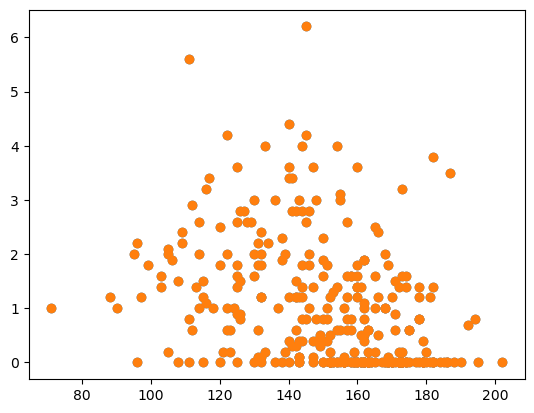

In [48]:
# thalach and old peak are the top two important feature

import matplotlib.pyplot as plt

plt.scatter(data=df,x="thalach",y="oldpeak")
plt.show()

# the Random forest through hyper parameter tuning has provided better results comapring the model without any tuning